<a href="https://colab.research.google.com/github/BoHye0202/Kaggle/blob/main/mnist/MNIST_%EC%9D%B8%EC%8B%9D_%EB%AA%A8%EB%8D%B8%ED%99%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 학습 완료된 모델을 사용하여 실제 손글씨를 인식하기

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow # colab
import numpy as np
from tensorflow.keras.models import load_model

## RGB to Gray

In [2]:
img_color = cv.imread('number.png', cv.IMREAD_COLOR) # 이미지파일 불러오기
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY) # gray스케일로 변환하기

## Gray to Binary
- 그레이스케일 이미지를 이진화하여 바이너리 이미지로 변환
- 모폴로지 연산을 적용하여 이진화 결과로 생겼을지 모를 빈 공백을 메꾸기


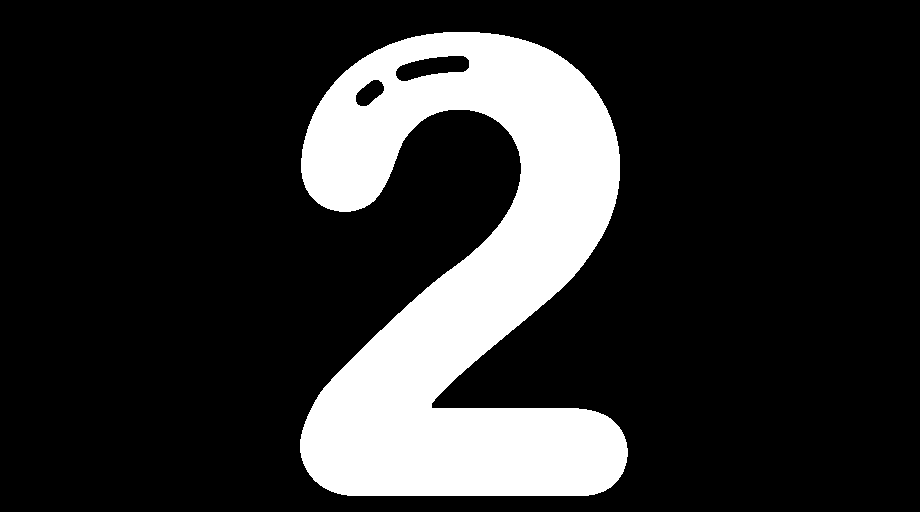

In [3]:
ret, img_binary = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)

# 모폴로지 연산 수행
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5,5))
img_binary = cv.morphologyEx(img_binary, cv.MORPH_CLOSE, kernel) # 모폴로지 연산을 적용

cv2_imshow(img_binary)
cv.waitKey(0);

## Contour
숫자별로 분리하기 위해서 컨투어 작업

In [4]:
contours, hierarchy = cv.findContours(img_binary, cv.RETR_EXTERNAL, 
                                      cv.CHAIN_APPROX_SIMPLE)

## Model에 적용하기

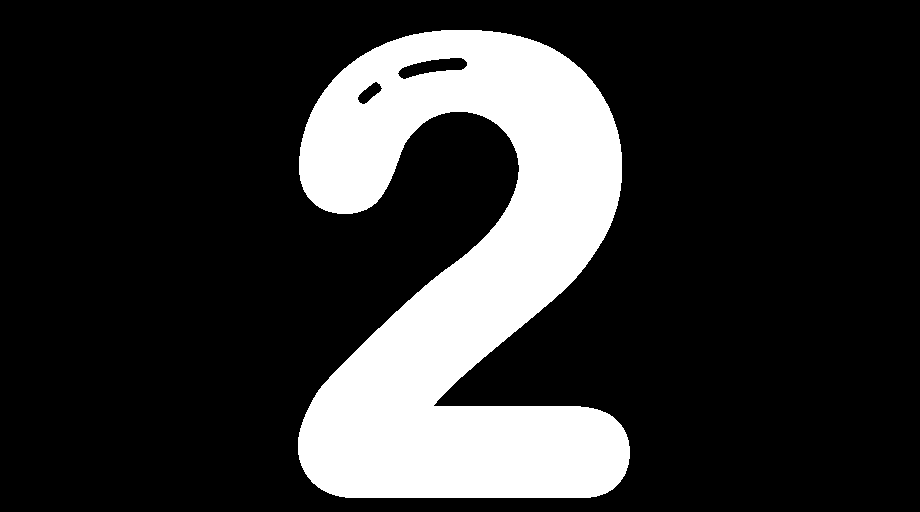

2


In [5]:
for contour in contours:
  x,y,w,h = cv.boundingRect(contour) # 숫자별로 경계박스 구하기

  length = max(w,h) * 60 # 가로, 세로 중 긴 방향에서 여분을 추가하여 한변의 크기
  img_digit = np.zeros((length, length, 1), np.uint8) # 잘라낸 숫자 이미지를 저장할 빈 이미지 생성
  
  new_x, new_y = x-(length - w)//2, y-(length - h)//2 # 숫자가 이미지 정중앙에 오도록 경계박스의 시작 위치 조정
  
  img_digit = img_binary[new_y:new_y+length, new_x:new_x+length] # 바이너리 이미지에서 숫자영역은 img_digit에 저장

  # 숫자가 잘 인식되도록 팽창 모폴로지 연산 적용 
  kernel = np.ones((5, 5), np.uint8)
  img_digit = cv.morphologyEx(img_digit, cv.MORPH_DILATE, kernel)

  cv2_imshow(img_digit)
  cv.waitKey(0)

  model = load_model('mnist_model.h5') # 모델 불러오기

  img_digit = cv.resize(img_digit, (28, 28), interpolation=cv.INTER_AREA) # 모델에서 요구하는 이미지크기로 만들기

  img_digit = img_digit / 255.0 # 이미지 normalization

  img_input = img_digit.reshape(1, 28, 28, 1) # 모델에서 요구하는 input shape
  predictions = model.predict(img_input) # 모델 사용해서 예측하기

  number = np.argmax(predictions) # softmax결과를 숫자로 변환 model = load_model('model.h5') # 모델 불러오기
  print(number)

  cv.rectangle(img_color, (x, y), (x+w, y+h), (255, 255, 0), 2) # 원본이미지의 숫자마다 사각형 그려주기
  
  # 이미지에 있는 숫자위에 인식된 숫자 적어주기 
  location = (x + int(w *0.5), y - 10)
  font = cv.FONT_HERSHEY_COMPLEX  
  fontScale = 1.2
  cv.putText(img_color, str(number), location, font, fontScale, (0,255,0), 2)
  
  # 이미지에서 잘라낸 숫자부분을 가공한 결과를 보여줍니다.
  cv2_imshow(img_digit)
  cv.waitKey(0)

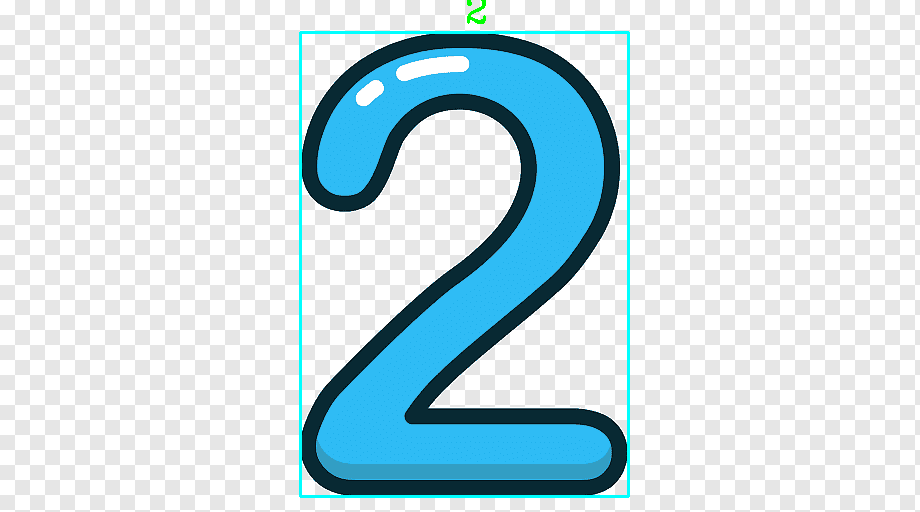

In [6]:
# 원본 이미지에 인식한 숫자를 적은 결과 보여주기
result = cv2_imshow(img_color)